In [50]:
# import numpy
import numpy as np
import pandas as pd
# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

* print shape of X

In [3]:
X.shape

(150, 4)

* print y

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* create logistic regression model

In [5]:
logistic = linear_model.LogisticRegression()

* create regularization space for 'penalty' param (a.k.a. what values do we want to insert into GridSearch?)

In [6]:
# Create regularization penalty space
penalty = ['l1', 'l2']



* create regularization space for 'c' param (a.k.a. what values do we want to insert into GridSearch?)

In [7]:
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

* create hyperparameter options dictionary

In [8]:
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

* create grid search using 5-fold cross validation

In [9]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

* fit grid search

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

* take best model from grid search

In [19]:
best_model.best_score_

0.9731225296442687

* print best hyperparameters

In [20]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 59.94842503189409


* predict target vector
    - class
    - probabilities

In [22]:
# from the documentation once it finds the best parameters it uses it
y_pred = best_model.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

- plot the ROC curve and pring the AUC

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred,average='macro'))
print('Recall:',metrics.recall_score(y_test,y_pred,average='macro'))

Accuracy: 0.9736842105263158
Precision: 0.9666666666666667
Recall: 0.9791666666666666


* print Logreg coeficients

In [54]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2',C=59,multi_class='ovr')

In [55]:
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [56]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Matplotlib
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (12,8)

Text(0.5, 510.88, 'Predicted label')

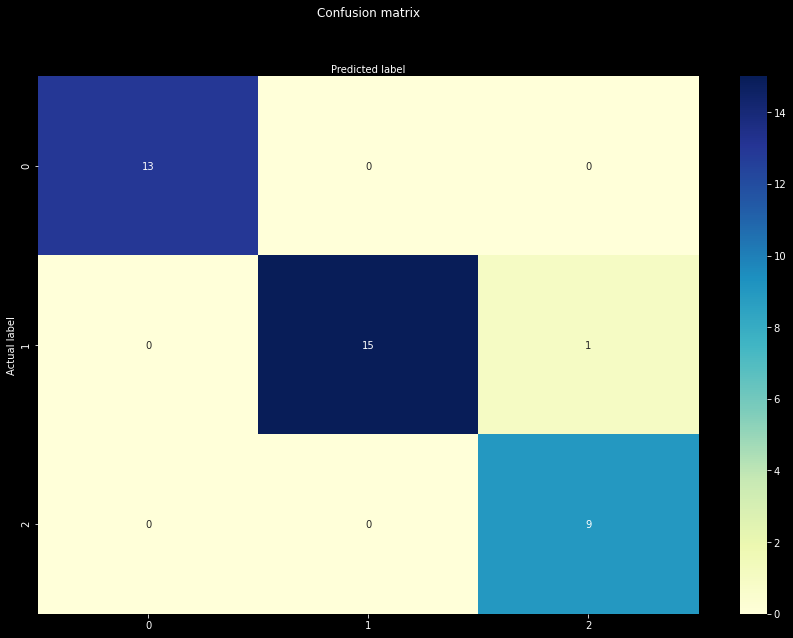

In [57]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
logreg.coef_

array([[-0.53192891,  2.00759752, -4.51506468, -2.14008716],
       [-0.45707051, -2.47224977,  1.46925769, -2.96964448],
       [-3.62683399, -3.25586168,  9.34375794,  7.22172787]])

In [64]:
logreg.intercept_

array([  9.99883782,   7.13503857, -25.89660843])

* print Logreg intercepts

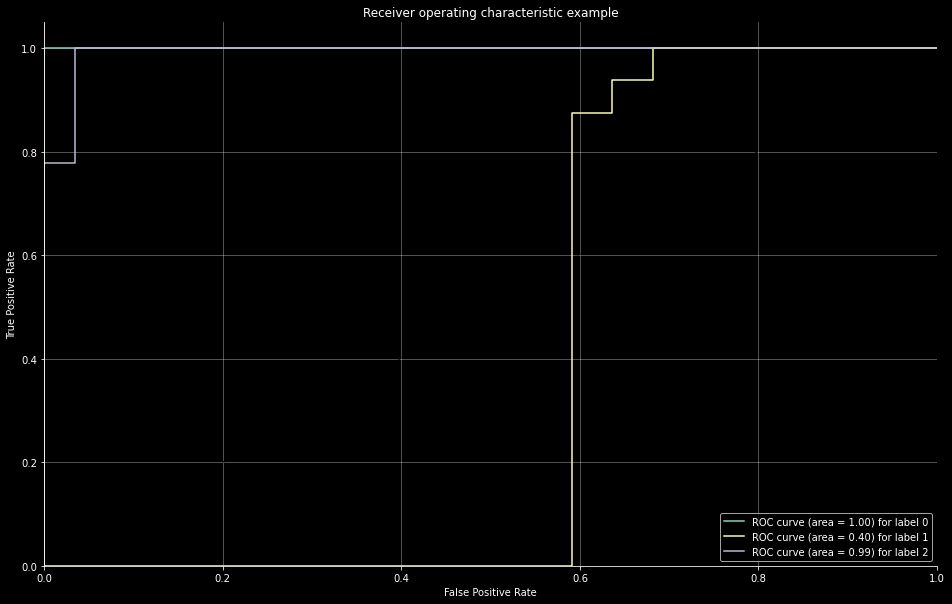

In [70]:
from sklearn.metrics import roc_curve, auc
# stack overflow
# https://stackoverflow.com/questions/45332410/sklearn-roc-for-multiclass-classification
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(best_model, X_test, y_test, n_classes=3, figsize=(16, 10))